In [ ]:
from db import Account

In [ ]:
Account

In [ ]:
from server import db

In [ ]:
acc = Account(firstname='Bernice', secondname="Ong'ayo", username='admin', email='ambundothesecond@gmail.com', password='boaboa')


In [ ]:
db.session.add(acc)

In [ ]:
db.session.commit()

In [2]:
import requests

In [ ]:
resp = requests.get('http://127.0.0.1:5000/login')
resp.content

In [ ]:
url = 'http://127.0.0.1:5000/create_account'
data = {
    'firstname':'Monica',
    'secondname':'Mbugua',
    'email':'monicambugua@gmail.com',
    'username':'mbugush',
    'password':'monicas',
    'image':'D:/files/images/IMG-20220313-WA0011.jpg'
}
resp = requests.post(url, data=data)
resp.content

In [ ]:
url = 'http://127.0.0.1:5000/check_username'
data = {'username':'admin'}
resp = requests.post(url, data=data)
if 'Invalid' in str(resp.content):
    print('in use ')
else:
    print('Not in use')

In [ ]:
url = 'http://127.0.0.1:5000/upload'
data = {'file':('monica.jpg', open('D:/files/images/IMG-20220313-WA0011.jpg', 'rb'))}
resp = requests.post(url, files=data)
resp

In [ ]:
url = 'http://127.0.0.1:5000/files'
data = {'username':'admin'}
resp = requests.get(url)



In [24]:
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import base64

In [ ]:
image = Image.open(BytesIO(resp.content))


In [ ]:
type(resp.content)

In [ ]:
plt.imshow(image)

In [ ]:
resp.headers

In [ ]:
from flask import send_from_directory

In [ ]:
url = 'http://127.0.0.1:5000/house'
data = {'housetype':'Bungalow',
				'location_description':'The house is  next to the Museum Arcade and close to the parliament building',
				'floorspace': 13,
				'name':'The masters',
				'region':'Nairobi',
				'location':'West Lands',
                'rooms':12,
				'water':True,
				'rent':20000,
				'gps':'23.34434, 26.784'}
files = {'picture':('monica.jpg', open('D:/files/images/IMG-20220313-WA0011.jpg', 'rb'))}
resp = requests.post(url, data=data, files=files)
resp

In [ ]:
url ='http://127.0.0.1:5000/room'
data =  {
				'hotelname':'serena',
				'region':'Nairobi',
				'roomtype':'luxury',
				'gps':'84.737348,72.8734423',
				'amount':82382,
				'location':'Opposite luxury casino',
				'description':'The room is furnished with a lot of content and the place is very secure'
		}
files = {'picture':('monica.jpg', open('D:/files/images/IMG-20220313-WA0011.jpg', 'rb'))}
resp = requests.post(url, data=data, files=files)
resp

In [4]:
url ='http://127.0.0.1:5000/uploads/monica.jpg'
resp =  requests.get(url)
resp

<Response [200]>

In [ ]:
resp.headers

In [2]:
r = requests.get('http://localhost:5000/get_images')

In [3]:
r'C:\Users\HP\Pictures\_yibs_ke-20220923-0001.webp'

<Response [200]>

In [4]:
result = r.json()

for img in result['images'][:3]:
    i = img.replace('/', '_')
    file = i.replace('\\','_')
    print(file)
    r = requests.get(f'http://localhost:5000/get_file/{file}')
    print(r.content)
    

In [ ]:
base64.b64decode(result['result'][0])

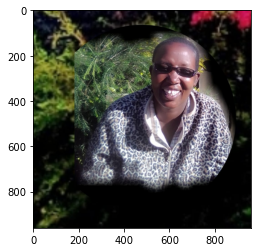

In [17]:
for pos, img in enumerate(result['images'][:1]):
    i = img.replace('/', '_')
    file = i.replace('\\','_')
    #print(file)
    r = requests.get(f'http://localhost:5000/get_file/{file}')
    pic = Image.open(BytesIO(r.content))
    plt.imshow(pic)

In [10]:
import os
string = 'D:/GDWhatsApp/Media/GBWhatsApp Images/IMG-20220414-WA0004/remove/bg.png'
if 'remove' in string:
    s = string.split('/')
    temp = ''
    print(s[-2:])
    v = s[-2:]
    f = s[4] + '_' + v[0] +'_'+ v[1]
    for i in s[:-3]:
        k = i + '/'
        temp+=  k
    print(s[4])   
    print(os.path.join(temp, f))
    

['remove', 'bg.png']
IMG-20220414-WA0004
D:/GDWhatsApp/Media/GBWhatsApp Images/IMG-20220414-WA0004_remove_bg.png


In [18]:
from threading import Thread

In [ ]:
class WorkLoadDistributor:
    ''' Distribute the work load to a specided number of threads'''
    max_thread = 1
    runners = 1
    waiting = []
    def __init__(self,func max_thread=5):
        self.max_thread = max_thread
        self.runners = self.max_thread
        self.func = func
    @classmethod
    def run(cls, *args):
        self.args = args 
        if cls.max_thread < self.runners:
            self.waiting.append(args)
        else:
            cls.create_thread(args)
    def create_thread(self, args):
        for run in range(max_thread)
        
        

In [48]:
# controller:
from db import Account, Room, House, LandLord, engine
from sqlalchemy.orm import sessionmaker
import json

session = sessionmaker()(bind=engine) #create a custom session for updating the database
# this is to ensure reliability of the database even with multiple connections


class Controller:
    
    
    def create_json_dict(self, result):
        ''' 
        convert the result into  a dictionary then to the to a json which will be return to the request
            :args: result
                result is a list of list and should be processed as such
        '''
        mappings = {}
        for res in result:
            if res:
                #confirm the the list actualy has values before processing it
                for value in res:
                    # the value here is taken to be a ~db.Room  
                    dic = value.serialize
                    if dic['id'] in mappings:
                        pass
                    else:
                        mappings[dic['id']] = dic

        return json.dumps(mappings, indent=4)
class RoomController(Controller):
    ''' create a brigde between between the view and the models'''
    def __init__(self):
        self.room = None
    @staticmethod
    def add_items(self, hotelname='',
				  region='',
				  roomtype='',
				  location='',
				  gps='',
				  amount=0,
				  description=''):
        ''' populate the fields of the room database'''
        self.room = Room(hotelname=hotelname,region=region, roomtype=roomtype,location=location,gps=gps, amount=amount, description=description,)
        self.commit(self.room)
    def commit(self, room_instance):
        session.add(room_instance)
        session.commit()
    def query(self, value):
        ''' :'Query the database for multiple value in different fields
        returns an json with the values found in the database
        '''
        hotelname = session.query(Room).filter(Room.hotelname.like(f'%{value}%')).all()
        region = session.query(Room).filter(Room.region.like(f'%{value}%')).all()
        roomtype = session.query(Room).filter(Room.roomtype.like(f'%{value}%')).all()
        location = session.query(Room).filter(Room.location.like(f'%{value}%')).all()
        description = session.query(Room).filter(Room.description.like(f'%{value}%')).all()
        values =[hotelname, region, roomtype, location, description]
        return self.create_json_dict(values)
    


class AccountController(Controller):
    def __init__(self):
        self.account = None
    def query(self, value):
        ''' Search the username of with that value'''
        username = session.query(Account).filter(Account.username.like(f'%{value}%')).all()
        
        return self.create_json_dict([username])
        
class HouseController(Controller):
    
    def query(self, value):
        ''' search the hotel name '''
        name = session.query(House).filter(House.name.like(f'%{value}%')).all()
        location = session.query(House).filter(House.location.like(f'%{value}%')).all()
        result = [location, name]
        return self.create_json_dict(result)
        
class LandlordController(Controller):
    def query(self, value):
        name = session.query(LandLord).filter(LandLord.names.like(f'%{value}%')).all()
        return self.create_json_dict([name])


        
        



In [49]:
room = LandlordController()

In [50]:
room.query('serena')

2023-10-10 11:01:06,206 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-10-10 11:01:06,217 INFO sqlalchemy.engine.Engine SELECT landlord.id AS landlord_id, landlord.names AS landlord_names, landlord.house AS landlord_house, landlord.phone_no AS landlord_phone_no, landlord.address AS landlord_address, landlord.location AS landlord_location 
FROM landlord 
WHERE landlord.names LIKE ?
2023-10-10 11:01:06,220 INFO sqlalchemy.engine.Engine [generated in 0.00339s] ('%serena%',)


'{}'

In [79]:
url = 'http://127.0.0.1:5000/search'
resp = requests.post(url, data={'searchQuery':'serena'})
resp.status_code

200

In [82]:
from pprint import pprint
for key, value in dict(resp.json()).items():
    print(type(value))


<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [81]:
dict(resp.json())

{'Account': [],
 'House': [],
 'LandLord': [],
 'Room': [{'amount': 82382,
   'description': 'The room is furnished with a lot of content and the place is very secure',
   'gps': '84.737348,72.8734423',
   'hotelname': 'serena',
   'id': 1,
   'location': 'Opposite luxury casino',
   'picture': 'monica.jpg',
   'region': 'Nairobi',
   'roomtype': 'luxury'},
  {'amount': 82382,
   'description': 'The room is furnished with a lot of content and the place is very secure',
   'gps': '84.737348,72.8734423',
   'hotelname': 'serena',
   'id': 2,
   'location': 'Opposite luxury casino',
   'picture': 'monica.jpg',
   'region': 'Nairobi',
   'roomtype': 'luxury'},
  {'amount': 82382,
   'description': 'The room is furnished with a lot of content and the place is very secure',
   'gps': '84.737348,72.8734423',
   'hotelname': 'serena',
   'id': 3,
   'location': 'Opposite luxury casino',
   'picture': 'monica.jpg',
   'region': 'Nairobi',
   'roomtype': 'luxury'},
  {'amount': 82382,
   'descri

In [2]:
import mimetypes
import urllib

In [10]:
filename = "http://localhost:5000//get_file/IMG-20220629-WA0000_remove_bg.png"
request = urllib.request.Request(filename)
fd = urllib.request.urlopen(request)
ctypes = fd.info().get_content_type()
suffix = mimetypes.guess_extension(ctypes)

In [11]:
fd.info().get_content_type()

'image/png'

In [13]:
data = fd.read()

In [32]:
import tempfile
import os
import io
import base64

In [16]:
out, filename = tempfile.mkstemp(prefix='downloads', suffix=suffix)

In [21]:

os.write(out, data)
os.close(out)

In [28]:
pic = Image.open(filename)
type(pic)

PIL.PngImagePlugin.PngImageFile

In [31]:
arr = io.BytesIO()
pic.save(arr, format='png')

In [33]:
encoded = base64.encodebytes(arr.getvalue()).decode('utf-8')

In [45]:
#base64.decodebytes(encoded.encode('utf-8'))

In [46]:
import gzip

In [49]:
compressed = gzip.compress(encoded.encode('utf-8'))

In [50]:
len(compressed)

233846